In [ ]:
from Prepare_data import load_filtered_normalize_data
import pandas as pd
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import skdim

In [2]:
#TO DO
# concatenare per bene
# usare https://scikit-dimension.readthedocs.io/en/latest/skdim.id.TwoNN.html#skdim.id.TwoNN 
# per stimare dimensionalita instrinseche
# poi umap per arrivare a quella dimensionalita' oppure rpca per arrivare a dimensionalita' intrinseca

# applicare remove correlated di R per buttare via features.
# poi usare prima mannwhtiney da solo e poi applicare le mann+multivariate, sopratutto con mRNA che ha 20k features.
# l'idea e' di avere una funzione che addestra che mi sputa gli score, il modello addestrato 
# + le feature che ha usato sui fold per addestrare 
# usare poi quelle per applicare multivariate

# Import data

In [3]:
# import data from csv 
cnv = pd.read_csv('dataset_hg19/dataset/cnv.csv', sep=' ')

cnv.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-3C-AALI,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-3C-AALK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-4H-AAAK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5T-A9QA,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
miRNA = pd.read_csv('dataset_hg19/dataset/mirna.csv', sep=' ')

miRNA.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-3,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-3C-AALI,49201,98691,49035,148591,5095,3263,3566,133,41683,2231,...,0,0,52,0,4,8,383,547,1503,80378
TCGA-3C-AALK,57278,114320,57540,164553,18464,2114,8364,113,40723,2245,...,0,0,22,0,22,11,459,263,6620,152218
TCGA-4H-AAAK,67196,134563,67607,136918,20429,2162,10556,139,50848,2056,...,0,0,13,0,7,5,123,212,6666,158568
TCGA-5L-AAT1,94243,188921,94346,211457,21076,2657,12104,272,94610,3903,...,0,0,23,0,12,11,235,529,5352,196557
TCGA-5T-A9QA,49313,97721,49623,127544,2134,1769,8190,104,28306,2792,...,0,0,72,0,3,23,186,146,445,127728


In [5]:
mRNA = pd.read_csv('dataset_hg19/dataset/mrna.csv', sep=' ')

mRNA.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-3C-AALI,436.55,0,0,130.32,8,13924.87,290,1,0,1633,...,110,825,2470,365,1110,10123,2425,748,1704,0
TCGA-3C-AALK,461.69,0,0,151.08,4,26490.85,1224,0,0,1878,...,133,1058,2088,424,1468,13756,1888,1694,161,0
TCGA-4H-AAAK,631.87,1,9,362.77,8,22525.79,804,1,1,1925,...,115,997,2467,33,1823,9498,1955,2072,440,0
TCGA-5L-AAT1,259.26,0,0,125.12,5,18903.93,323,1,0,971,...,55,697,1213,66,630,5421,1732,698,71,0
TCGA-5T-A9QA,600.72,1,1,446.68,0,6084.91,787,7,0,1670,...,55,547,1548,4,615,6160,2132,843,7,0


In [6]:
proteins = pd.read_csv('dataset_hg19/dataset/proteins.csv', sep=' ')

proteins.head()

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,A-Raf_pS299,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,-0.000752,0.022553,0.021112,0.101796,-0.382850,-0.108997,0.103860,-0.335720,0.139450,0.148123,...,-0.076626,-0.231296,-0.169884,0.040360,-0.043975,1.293687,0.783984,0.162565,-0.667649,-0.102581
TCGA-3C-AALK,-0.202252,0.077041,0.153997,0.299107,-0.438903,-0.460678,-0.358195,0.474016,0.376476,-0.160318,...,-0.219547,-0.340080,0.208381,0.365363,-0.136875,0.680809,0.612644,-0.131174,0.419210,-0.118623
TCGA-4H-AAAK,-0.208434,0.062566,0.034209,0.429696,-0.102852,-0.499466,-0.433138,0.143794,0.339525,-0.221161,...,-0.070647,-0.471717,-0.052702,0.068514,-0.080364,0.300677,0.819253,-0.520017,0.003252,-0.855659
TCGA-5L-AAT1,-0.465476,0.141845,0.232721,0.427772,-0.231596,0.276124,-0.411702,0.736283,0.398665,-0.063979,...,-0.145362,-0.582255,0.346637,0.289421,-0.225658,0.591818,0.623455,-0.559783,0.510494,-0.601296
TCGA-5T-A9QA,-0.354823,0.156575,0.249023,1.197526,0.447913,1.001215,0.307314,0.581762,0.316779,-0.085146,...,0.076588,-0.325001,0.166015,-1.064492,0.181296,-0.226434,0.842169,0.280629,0.524148,-0.500144


# Import label

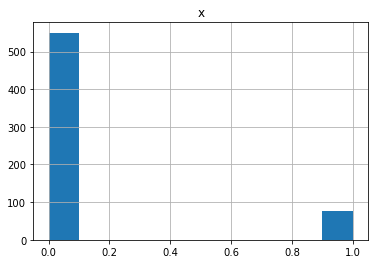

In [7]:
label = pd.read_csv('dataset_hg19/dataset/labels_pfi.csv', sep=' ')

label.hist()
plt.show()

In [8]:
dataset_dict = {'cnv': cnv, 'miRNA': miRNA, 'mRNA': mRNA, 'proteins': proteins}

%time datasets = load_filtered_normalize_data(dataset_dict)

CPU times: user 19.9 s, sys: 857 ms, total: 20.7 s
Wall time: 20.6 s


# Create concatenation of all dataset. Train using mannwhitneyu and boruta

In [9]:
dataset_concat = pd.concat([datasets['cnv'], datasets['proteins'], datasets['mRNA'], datasets['miRNA']], axis=1)

In [10]:
datasets['concat'] = dataset_concat

# Remove correlated feature using R code

In [21]:
robjects.r("""
install.packages('caret')
install.packages("intrinsicDimension")
install.packages("intRinsic")
install.packages("impute")
install.packages("genieclust")
""")

R[write to console]: Installazione pacchetto in ‘/usr/local/lib/R/site-library’
(perché ‘lib’ non è specificato)

R[write to console]: apertura URL 'https://cloud.r-project.org/src/contrib/caret_6.0-93.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2273775 bytes (2.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

gcc -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -ffile-prefix-map=/build/r-base-anRV6o/r-base-4.2.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c caret.c -o caret.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -flto=auto -ffat-lto-objects -flto=auto -Wl,-z,relro -o caret.so caret.o -L/usr/lib/R/lib -lR


installing to /usr/local/lib/R/site-library/00LOCK-caret/00new/caret/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (caret)
R[write to console]: 

R[write to console]: 
R[write to console]: I pacchetti scaricati con il codice sorgente sono in
	‘/tmp/RtmprXBqYA/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Installazione pacchetto in ‘/usr/local/lib/R/site-library’
(perché ‘lib’ non è specificato)

R[write to console]: apertura URL 'https://cloud.r-project.org/src/contrib/intrinsicDimension_1.2.0.tar.gz'

R[write to console]: Content type 'applica

g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include' -I'/usr/local/lib/R/site-library/RcppArmadillo/include'   -fopenmp -fpic  -g -O2 -ffile-prefix-map=/build/r-base-anRV6o/r-base-4.2.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c RcppExports.cpp -o RcppExports.o
g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include' -I'/usr/local/lib/R/site-library/RcppArmadillo/include'   -fopenmp -fpic  -g -O2 -ffile-prefix-map=/build/r-base-anRV6o/r-base-4.2.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c intR_source.cpp -o intR_source.o
g++ -std=gnu++11 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -flto=auto -ffat-lto-objects -flto=auto -Wl,-z,relro -o intRinsic.so RcppExports.o intR_source.o -fopenmp -llapack -lblas -lgfortran -lm -lquadmath -L/usr/lib/R/lib -lR


installing to /usr/local/lib/R/site-library/00LOCK-intRinsic/00new/intRinsic/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (intRinsic)
R[write to console]: 

R[write to console]: 
R[write to console]: I pacchetti scaricati con il codice sorgente sono in
	‘/tmp/RtmprXBqYA/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Installazione pacchetto in ‘/usr/local/lib/R/site-library’
(perché ‘lib’ non è specificato)

R[write to console]: Installazione pacchetto in ‘/usr/local/lib/R/site-library’
(perché ‘lib’ non è specificato)

R[write to console]: apertura URL 'ht

g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include'   -fopenmp -DGENIECLUST_R -fpic  -g -O2 -ffile-prefix-map=/build/r-base-anRV6o/r-base-4.2.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c RcppExports.cpp -o RcppExports.o
g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include'   -fopenmp -DGENIECLUST_R -fpic  -g -O2 -ffile-prefix-map=/build/r-base-anRV6o/r-base-4.2.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c r_compare_partitions.cpp -o r_compare_partitions.o
g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/local/lib/R/site-library/Rcpp/include'   -fopenmp -DGENIECLUST_R -fpic  -g -O2 -ffile-prefix-map=/build/r-base-anRV6o/r-base-4.2.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c r_cvi.cpp -o r_cvi.o
g++ -std=gnu++11 -I"/usr/share/R/i

installing to /usr/local/lib/R/site-library/00LOCK-genieclust/00new/genieclust/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (genieclust)
R[write to console]: 

R[write to console]: 
R[write to console]: I pacchetti scaricati con il codice sorgente sono in
	‘/tmp/RtmprXBqYA/downloaded_packages’
R[write to console]: 
R[write to console]: 



<rpy2.rinterface_lib.sexp.NULLType object at 0x7f2013094c00> [RTYPES.NILSXP]

In [23]:
robjects.r("""
library(doParallel)
library(dplyr)
library(stringr)
library(caret)
library(intrinsicDimension)
library(intRinsic)
library(ggplot2)
library(genieclust)
""")

'genieclu...,'intRinsic','intrinsi...,...,'datasets','methods','base'


In [24]:
robjects.r("""
remove_correlated_par <- function(df, dim_split = 1000, maxiter = 5, method = "pearson", cutoff = 0.8){
  
  #df has features on columns
  X = t(df)
  niter = 0
  if (!is.finite(dim_split)) dim_split = nrow(X)
  cat("dim(X) before starting remove correlation: ", dim(X), "\n")
  while(niter < maxiter ){
    cat("niter = ", niter, '\n')
    filtered_X = NULL
    
    cl <- makeCluster(4)
    registerDoParallel(cl)
    
    filtered_X = foreach(nR = seq(1, nrow(X), by=dim_split), 
                         .combine='rbind', .packages = c("caret")) %dopar% {
                           
         subX = X[nR:min(nrow(X), (nR+dim_split-1)), ]
         cc = cor(t(subX), use = "pairwise.complete.obs", method = "kendall")
         
         select_corr = caret::findCorrelation(cc, cutoff = cutoff, exact = FALSE)
         #print(length(select_corr))
         
         if (length(select_corr)>0){ 
           subX = subX[-select_corr, ]
         }
         
         return(subX)
           
     }
    
    stopCluster(cl)
    
    print(names(filtered_X))
    #    if (length(unique(filtered_X[,1]))>1) cat('PROBLEMA!')
    no_removed = nrow(X)-nrow(filtered_X)
    cat('Removed = ', no_removed, '\n')
    cat('dim filetered_X =', dim(filtered_X), '\n')

    X = filtered_X[sample(nrow(filtered_X)), ]
    
    niter = niter + 1
    cat("nrow(X) =", dim(X), '\n')
    if (no_removed ==0) break;
  }
  cat('final dimension = ', dim(t(X)), '\n')
  
  return(t(X))
    }
    """)

<rpy2.robjects.functions.SignatureTranslatedFunction object at 0x7f203c8a95c0> [RTYPES.CLOSXP]
R classes: ('function',)

In [28]:
with localconverter(ro.default_converter + pandas2ri.converter):
    r_proteins = ro.conversion.py2rpy(datasets['proteins'])

r_proteins

14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,...,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
0.403974,0.533935,0.406886,...,0.435960,0.231455,0.480984
0.303318,0.565050,0.448557,,0.322088,0.608802,0.473838
0.300230,0.556784,0.410993,,0.171347,0.464385,0.145520
0.171829,0.602057,0.473243,,0.155931,0.640495,0.258829
...,...,...,,...,...,...
0.362785,0.581322,0.553549,,0.291261,0.460639,0.383711
0.207706,0.650906,0.433922,,0.127698,0.663534,0.245199
0.347305,0.504144,0.477080,,0.239462,0.652143,0.426395
0.122879,0.501788,0.488921,,0.121869,0.471088,0.278298


In [32]:
r_proteins_removed = robjects.globalenv["remove_correlated_par"](r_proteins)

r_proteins_removed

dim(X) before starting remove correlation:  216 627 
niter =  0 
NULL
Removed =  0 
dim filetered_X = 216 627 
nrow(X) = 216 627 
final dimension =  627 216 


0.202014,0.200541,0.243913,...,0.572417,0.560589,0.450225


In [33]:
prova = {}

prova['r_proteins'] = r_proteins_removed

In [30]:
with localconverter(ro.default_converter + pandas2ri.converter):
    r_mirna = ro.conversion.py2rpy(datasets['miRNA'])

r_mirna

hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,...,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0.118843,0.119289,0.117400,...,0.166206,0.024324,0.055582
0.140045,0.139836,0.139602,,0.078955,0.113358,0.112672
0.166080,0.166448,0.165881,,0.063287,0.114158,0.117719
0.237079,0.237909,0.235682,,0.160676,0.091295,0.147908
...,...,...,,...,...,...
0.088356,0.088473,0.088724,,0.085100,0.065892,0.071841
0.427241,0.427864,0.426683,,0.172965,0.329563,0.102730
0.141405,0.141958,0.142674,,0.116129,0.139439,0.099325
0.099423,0.099472,0.100716,,0.096774,0.030936,0.100159


In [37]:
rmirna_removed = robjects.globalenv["remove_correlated_par"](r_mirna)

rmirna_removed

dim(X) before starting remove correlation:  773 627 
niter =  0 
NULL
Removed =  12 
dim filetered_X = 761 627 
nrow(X) = 761 627 
niter =  1 
NULL
Removed =  0 
dim filetered_X = 761 627 
nrow(X) = 761 627 
final dimension =  627 761 


0.000000,0.000000,0.000000,...,0.166667,0.000000,0.083333


In [38]:
prova['rmirna_removed'] = rmirna_removed

In [39]:
with localconverter(ro.default_converter + pandas2ri.converter):
    r_mrna = robjects.conversion.py2rpy(datasets['mRNA'])

r_mrna

A1BG,A1CF,A2BP1,...,ZZZ3,psiTPTE22,tAKR
0.089449,0.000000,0.000000,...,0.017930,0.220236,0.000000
0.094835,0.000000,0.000000,,0.055456,0.020339,0.000000
0.131292,0.058824,0.024390,,0.070451,0.056484,0.000000
0.051470,0.000000,0.000000,,0.015947,0.008680,0.000000
...,...,...,,...,...,...
0.028475,0.000000,0.016260,,0.002697,0.004146,0.000000
0.117391,0.000000,0.002710,,0.055774,0.031869,0.000000
0.153569,0.000000,0.002710,,0.038121,0.051302,0.000000
0.148807,0.000000,0.000000,,0.040938,0.007255,0.000000


In [ ]:
r_mrna_removed = robjects.globalenv["remove_correlated_par"](r_mrna)

r_mrna_removed

dim(X) before starting remove correlation:  18465 627 
niter =  0 


In [ ]:
prova['r_mrna_removed'] = r_mrna_removed

In [ ]:
with localconverter(ro.default_converter + pandas2ri.converter):
    r_mrna = robjects.conversion.py2rpy(datasets['cnv'])
    
r_cnv

In [ ]:
r_cnv_removed = robjects.globalenv["remove_correlated_par"](r_cnv)

r_cnv_removed

In [ ]:
prova['r_cnv_removed'] = r_cnv_removed

# Compute elaborated data removing correlated feature

In [ ]:
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise

In [ ]:
def store_elaborated_data(dataset_dict):
    if not os.path.exists('elaborated_data'):
        mkdir_p('elaborated_data')
        for data in dataset_dict:
            dataset_dict[data].to_json('filtered_normalize_data/'+data+'.json')

# Intrinsic dimension estimation using the TwoNN algorithm

In [ ]:
#generate data : np.array (n_points x n_dim). Here a uniformly sampled 5-ball embedded in 10 dimensions
data = np.zeros((1000,10))
data[:,:5] = skdim.datasets.hyperBall(n = 1000, d = 5, radius = 1, random_state = 0)

#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(data)
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA().fit_pw(data,
                              n_neighbors = 100,
                              n_jobs = 1)

#get estimated intrinsic dimension
print(danco.dimension_, np.mean(lpca.dimension_pw_))
